In [120]:
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import src.utils.time
import src.utils.dict
import src.utils.comps
import src.utils.module
import src.utils.json

import src.comps.heads_pyramid_2

In [121]:
tab20_color_list =\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[0::2]] +\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[1::2]]

---

In [122]:
data_df = pd.DataFrame({
    "backbone": pd.Series(dtype="str"),
    "exp_name": pd.Series(dtype="str"),
    "mean_train_avg_prec": pd.Series(dtype="float"),
    "mean_val_avg_prec": pd.Series(dtype="float"),
    "mean_test_avg_prec": pd.Series(dtype="float"),
    "avg_train_acc_at_1": pd.Series(dtype="float"),
    "avg_val_acc_at_1": pd.Series(dtype="float"),
    "avg_test_acc_at_1": pd.Series(dtype="float"),
    "avg_train_acc_at_10": pd.Series(dtype="float"),
    "avg_val_acc_at_10": pd.Series(dtype="float"),
    "avg_test_acc_at_10": pd.Series(dtype="float"),
    "avg_train_acc_at_20": pd.Series(dtype="float"),
    "avg_val_acc_at_20": pd.Series(dtype="float"),
    "avg_test_acc_at_20": pd.Series(dtype="float"),
    "avg_train_acc_at_50": pd.Series(dtype="float"),
    "avg_val_acc_at_50": pd.Series(dtype="float"),
    "avg_test_acc_at_50": pd.Series(dtype="float")
})

In [123]:
# SOTA

row = {}
row["exp_name"] = "-"
row["backbone"] = "Current SOTA"

row["mean_train_avg_prec"] = 0
row["mean_val_avg_prec"] = 0
row["mean_test_avg_prec"] = 0.492

row["avg_train_acc_at_1"] = 0
row["avg_val_acc_at_1"] = 0
row["avg_test_acc_at_1"] = 0.373

row["avg_train_acc_at_10"] = 0
row["avg_val_acc_at_10"] = 0
row["avg_test_acc_at_10"] = 0.712

row["avg_train_acc_at_20"] = 0
row["avg_val_acc_at_20"] = 0
row["avg_test_acc_at_20"] = 0.777

row["avg_train_acc_at_50"] = 0
row["avg_val_acc_at_50"] = 0
row["avg_test_acc_at_50"] = 0.850

data_df.loc[len(data_df)] = row

In [124]:
# ret_train_old_smpl/convnext_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_old_smpl", "convnext_t_s2")
for exp_name in ["exp_{:03d}".format(idx) for idx in [0, 6]]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = "ConvNeXt Tiny + Fusion"

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

In [125]:
# ret_train_old_smpl/swint_v2_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_old_smpl", "swint_v2_t_s2")
for exp_name in ["run_{:03d}".format(idx) for idx in [2]]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = "SwinTransformer V2 Tiny"

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

In [126]:
# ret_train_old_smpl_2/convnext_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_old_smpl_2", "convnext_t_s2")
for exp_name in ["glam_000_exp_007"]:

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = "ConvNeXt Tiny + GLAM"

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

In [127]:
# ret_train_glam_final/convnext_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_glam_final", "convnext_t_s2")

exp_names = [
    "glam_000_exp_000",
    "glam_001_exp_000",
    "glam_002_exp_000",
    "glam_003_exp_000"
]

backbone_names = [
    "ConvNeXt Tiny + GLAM + Fusion (1024)",
    "ConvNeXt Tiny + GLAM + Fusion (1440)",
    "ConvNeXt Tiny + GLAM + Fusion (1440, 1/2 1x1 Conv)",
    "ConvNeXt Tiny + GLAM + Fusion (1440, No 1x1 Conv)"
]

for exp_name, backbone_name in zip(exp_names, backbone_names):

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = backbone_name

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        print(backbone_name)

        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

ConvNeXt Tiny + GLAM + Fusion (1024)
ConvNeXt Tiny + GLAM + Fusion (1440)
ConvNeXt Tiny + GLAM + Fusion (1440, 1/2 1x1 Conv)
ConvNeXt Tiny + GLAM + Fusion (1440, No 1x1 Conv)


In [128]:
# ret_train_more_trf/gcvit_t_s2

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", "ret_train_more_trf", "gcvit_t_s2")

exp_names = [
    "test_adam_000",
    "test_sgd_001",
    "test_adam_000__no_lp",
    "test_adam_005__no_lp",
    "test_sgd_001__no_lp",
    "test_adam_000__no_lp__no_fc",
    "test_adam_005__no_lp__no_fc",
    "test_adam_bs_004_lr_000_g_000"
]

backbone_names = [
    "GCViT w/ Adam",
    "GCViT w/ SGD",
    "GCViT w/ Adam No LP",
    "GCViT w/ Adam No LP FD",
    "GCViT w/ SGD No LP",
    "GCViT w/ Adam No LP No FC",
    "GCViT w/ Adam No LP FD No FC",
    "GCViT w/ Adam No LP FD No FC HypSrch"
]

for exp_name, backbone_name in zip(exp_names, backbone_names):

    row = {}
    row["exp_name"] = exp_name

    #

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_2__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    row["backbone"] = backbone_name

    #

    metrics_filename = os.path.join(exp_dirname, exp_name, "eval_ctsrbm_metrics_2__data.json")
    if os.path.exists(metrics_filename):
    
        print(backbone_name)

        metrics_data = src.utils.json.load_json_dict(metrics_filename)
        
        row["mean_train_avg_prec"] = metrics_data["results"]["train"]["mean_avg_prec"]
        row["mean_val_avg_prec"] = metrics_data["results"]["val"]["mean_avg_prec"]
        row["mean_test_avg_prec"] = metrics_data["results"]["test"]["mean_avg_prec"]

        for num in [1, 10, 20, 50]:
            row["avg_train_acc_at_{:d}".format(num)] = metrics_data["results"]["train"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_val_acc_at_{:d}".format(num)] = metrics_data["results"]["val"]["avg_acc_at_k_dict"]["{:d}".format(num)]
            row["avg_test_acc_at_{:d}".format(num)] = metrics_data["results"]["test"]["avg_acc_at_k_dict"]["{:d}".format(num)]

    #

    data_df.loc[len(data_df)] = row

GCViT w/ Adam
GCViT w/ SGD
GCViT w/ Adam No LP
GCViT w/ Adam No LP FD
GCViT w/ SGD No LP
GCViT w/ Adam No LP No FC
GCViT w/ Adam No LP FD No FC
GCViT w/ Adam No LP FD No FC HypSrch


In [129]:
data_df

,backbone,exp_name,mean_train_avg_prec,mean_val_avg_prec,mean_test_avg_prec,avg_train_acc_at_1,avg_val_acc_at_1,avg_test_acc_at_1,avg_train_acc_at_10,avg_val_acc_at_10,avg_test_acc_at_10,avg_train_acc_at_20,avg_val_acc_at_20,avg_test_acc_at_20,avg_train_acc_at_50,avg_val_acc_at_50,avg_test_acc_at_50
0,Current SOTA,-,0.000000,0.000000,0.492000,0.000000,0.000000,0.373000,0.000000,0.000000,0.712000,0.000000,0.000000,0.777000,0.000000,0.000000,0.850000
1,ConvNeXt Tiny + Fusion,exp_000,0.110746,0.137988,0.138124,0.086208,0.111732,0.110554,0.244858,0.291734,0.296053,0.315445,0.368001,0.373213,0.429290,0.488882,0.496606
2,ConvNeXt Tiny + Fusion,exp_006,0.111118,0.138224,0.139591,0.086330,0.111629,0.112978,0.246446,0.292208,0.296812,0.317197,0.369774,0.373740,0.430716,0.492571,0.497512
3,SwinTransformer V2 Tiny,run_002,0.139656,0.172719,0.173148,0.113010,0.145671,0.144896,0.304458,0.358357,0.362483,0.383304,0.441919,0.442657,0.501517,0.565706,0.566661
4,ConvNeXt Tiny + GLAM,glam_000_exp_007,0.142920,0.176882,0.176179,0.119965,0.152843,0.152106,0.295711,0.348054,0.349285,0.363295,0.420694,0.424316,0.466987,0.531024,0.535312
5,ConvNeXt Tiny + GLAM + Fusion (1024),glam_000_exp_000,0.132711,0.163252,0.164650,0.109110,0.137099,0.139541,0.278736,0.328621,0.331197,0.346860,0.402147,0.405911,0.452283,0.516372,0.518995
6,ConvNeXt Tiny + GLAM + Fusion (1440),glam_001_exp_000,0.136133,0.167082,0.169721,0.112847,0.140808,0.145001,0.285426,0.336720,0.340557,0.353193,0.408742,0.414492,0.460083,0.524430,0.526985
7,"ConvNeXt Tiny + GLAM + Fusion (1440, 1/2 1x1 C...",glam_002_exp_000,0.137951,0.169868,0.169595,0.115118,0.144703,0.144959,0.287320,0.338162,0.339166,0.354415,0.411956,0.414323,0.458963,0.522493,0.528587
8,"ConvNeXt Tiny + GLAM + Fusion (1440, No 1x1 Conv)",glam_003_exp_000,0.174152,0.212114,0.211786,0.153344,0.191502,0.192921,0.345587,0.397696,0.398891,0.410930,0.466380,0.466712,0.507474,0.568446,0.570013
9,GCViT w/ Adam,test_adam_000,0.171074,0.208390,0.210236,0.139618,0.176046,0.178690,0.367877,0.426752,0.425307,0.451815,0.514456,0.512017,0.572899,0.637253,0.636337


---

In [130]:
def plot_metrics(
    metric_train_name,
    metric_val_name,
    metric_test_name
):

    backbone_list = [
        "Current SOTA",
        "ConvNeXt Tiny + Fusion",
        "SwinTransformer V2 Tiny",
        "ConvNeXt Tiny + GLAM",
        "ConvNeXt Tiny + GLAM + Fusion (1024)",
        "ConvNeXt Tiny + GLAM + Fusion (1440)",
        "ConvNeXt Tiny + GLAM + Fusion (1440, 1/2 1x1 Conv)",
        "ConvNeXt Tiny + GLAM + Fusion (1440, No 1x1 Conv)",
        "GCViT w/ Adam",
        "GCViT w/ SGD",
        "GCViT w/ Adam No LP",
        "GCViT w/ Adam No LP FD",
        "GCViT w/ SGD No LP",
        "GCViT w/ Adam No LP No FC",
        "GCViT w/ Adam No LP FD No FC",
        "GCViT w/ Adam No LP FD No FC HypSrch"
    ]

    backbone_to_legend_label_dict = {
        "Current SOTA": "Current SOTA",
        "ConvNeXt Tiny + Fusion": "ConvNeXt Tiny + Fusion",
        "SwinTransformer V2 Tiny": "SwinTransformer V2 Tiny",
        "ConvNeXt Tiny + GLAM": "ConvNeXt Tiny + GLAM",
        "ConvNeXt Tiny + GLAM + Fusion (1024)": "ConvNeXt Tiny + GLAM + Fusion \n  1440 -> 1024 | 1x1 Conv",
        "ConvNeXt Tiny + GLAM + Fusion (1440)": "ConvNeXt Tiny + GLAM + Fusion \n  1440 -> 1440 | 1x1 Conv",
        "ConvNeXt Tiny + GLAM + Fusion (1440, 1/2 1x1 Conv)": "ConvNeXt Tiny + GLAM + Fusion \n  1440 -> 1440 | 1x1 Conv (1/2)",
        "ConvNeXt Tiny + GLAM + Fusion (1440, No 1x1 Conv)": "ConvNeXt Tiny + GLAM + Fusion \n  1440 | No 1x1 Conv",
        "GCViT w/ Adam": "GCViT w/ Adam",
        "GCViT w/ SGD": "GCViT w/ SGD",
        "GCViT w/ Adam No LP": "GCViT w/ Adam No LP",
        "GCViT w/ Adam No LP FD": "GCViT w/ Adam No LP FD",
        "GCViT w/ SGD No LP": "GCViT w/ SGD No LP",
        "GCViT w/ Adam No LP No FC": "GCViT w/ Adam No LP No FC",
        "GCViT w/ Adam No LP FD No FC": "GCViT w/ Adam No LP FD No FC",
        "GCViT w/ Adam No LP FD No FC HypSrch": "GCViT w/ Adam No LP FD No FC HypSrch"
    }

    backbone_to_color_dict = {
        "Current SOTA": "black",
        "ConvNeXt Tiny + Fusion": tab20_color_list[0],
        "SwinTransformer V2 Tiny": tab20_color_list[1],
        "ConvNeXt Tiny + GLAM": tab20_color_list[12],
        "ConvNeXt Tiny + GLAM + Fusion (1024)": tab20_color_list[12],
        "ConvNeXt Tiny + GLAM + Fusion (1440)": tab20_color_list[12],
        "ConvNeXt Tiny + GLAM + Fusion (1440, 1/2 1x1 Conv)": tab20_color_list[12],
        "ConvNeXt Tiny + GLAM + Fusion (1440, No 1x1 Conv)": tab20_color_list[2],
        "GCViT w/ Adam": tab20_color_list[3],
        "GCViT w/ SGD": tab20_color_list[13],
        "GCViT w/ Adam No LP": tab20_color_list[14],
        "GCViT w/ Adam No LP FD": tab20_color_list[4],
        "GCViT w/ SGD No LP": tab20_color_list[14],
        "GCViT w/ Adam No LP No FC": tab20_color_list[15],
        "GCViT w/ Adam No LP FD No FC": tab20_color_list[5],
        "GCViT w/ Adam No LP FD No FC HypSrch": tab20_color_list[6]
    }

    backbone_to_bar_label_dict = {
        "Current SOTA": "SOTA",
        "ConvNeXt Tiny + Fusion": "CN-T\nFusion",
        "SwinTransformer V2 Tiny": "SwinV2-T",
        "ConvNeXt Tiny + GLAM": "CN-T\nGLAM",
        "ConvNeXt Tiny + GLAM + Fusion (1024)": "CN-T\nGLAM\nFusion\n1440-1024\nConv1",
        "ConvNeXt Tiny + GLAM + Fusion (1440)": "CN-T\nGLAM\nFusion\n1440-1440\nConv1",
        "ConvNeXt Tiny + GLAM + Fusion (1440, 1/2 1x1 Conv)": "CN-T\nGLAM\nFusion\n1440-1440\n1/2 Conv1",
        "ConvNeXt Tiny + GLAM + Fusion (1440, No 1x1 Conv)": "CN-T\nGLAM\nFusion\n1440\nNo Conv1",
        "GCViT w/ Adam": "GCViT\nAdam",
        "GCViT w/ SGD": "GCViT\nSGD",
        "GCViT w/ Adam No LP": "GCViT\nAdam\nNo LP",
        "GCViT w/ Adam No LP FD": "GCViT\nAdam\nNo LP\nFD",
        "GCViT w/ SGD No LP": "GCViT\nSGD\nNo LP",
        "GCViT w/ Adam No LP No FC": "GCViT\nAdam\nNo LP\nNo FC",
        "GCViT w/ Adam No LP FD No FC": "GCViT\nAdam\nNo LP\nFD\nNo FC",
        "GCViT w/ Adam No LP FD No FC HypSrch": "GCViT\nAdam\nNo LP\nFD\nNo FC\nHypSrch"
    }

    print(len(data_df))

    ord_df = data_df.copy()
    ord_df = ord_df[ord_df["backbone"].isin(backbone_list)]
    ord_df = ord_df[~(pd.isna(ord_df[metric_test_name]))]
    ord_df = ord_df.sort_values(metric_test_name, ascending=True)
    ord_df = ord_df.reset_index(drop=True)

    print(len(ord_df))

    ###

    plt.figure(figsize=(17, 6))

    ###

    bar_width = 0.8

    for backbone in backbone_list:

        ord_df_filt = ord_df[ord_df["backbone"] == backbone].copy()
        
        backbone_legend_label = backbone_to_legend_label_dict[backbone]
        backbone_color = backbone_to_color_dict[backbone]

        plt.bar(np.asarray(ord_df_filt.index) - bar_width/3, ord_df_filt[metric_train_name], color=backbone_color, alpha=0.5, width=bar_width/3, zorder=3)
        plt.bar(np.asarray(ord_df_filt.index), ord_df_filt[metric_val_name], color=backbone_color, alpha=0.6, width=bar_width/3, zorder=3)
        plt.bar(np.asarray(ord_df_filt.index) + bar_width/3, ord_df_filt[metric_test_name], color=backbone_color, alpha=1, width=bar_width/3, label=backbone_legend_label, zorder=3)

    #plt.legend(bbox_to_anchor=(1, 1))

    ###

    plt.xticks([])
    plt.title("{:s} / {:s} / {:s}".format(
        metric_train_name,
        metric_val_name,
        metric_test_name
    ))

    ###

    text_height = - plt.ylim()[1] * 0.12

    plt.text(-1, text_height, "Run", ha="center")

    for backbone in ord_df["backbone"].unique():

        ord_df_filt = ord_df[ord_df["backbone"] == backbone]

        bar_label = backbone_to_bar_label_dict[backbone]

        for idx in ord_df_filt.index:
            plt.text(idx, text_height, bar_label, ha="center", va="center", size=9)
            
    ###

    plt.grid(True, zorder=5)
    plt.show()

17
17


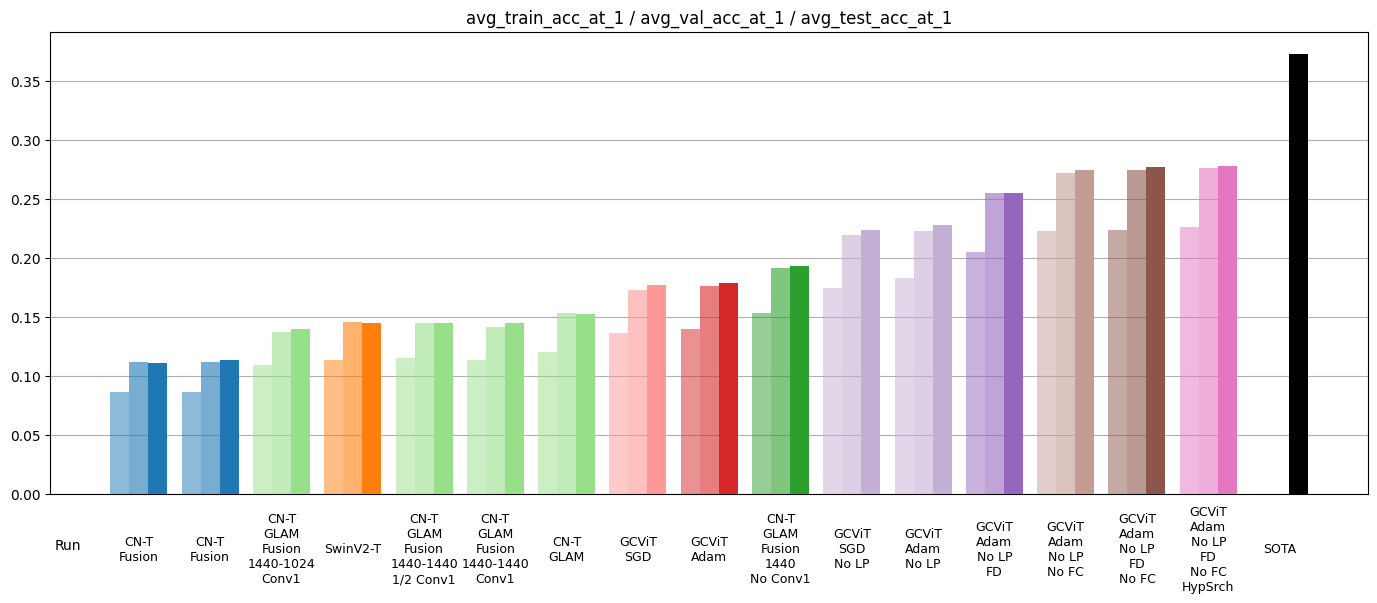

In [131]:
plot_metrics(
    "avg_train_acc_at_1",
    "avg_val_acc_at_1",
    "avg_test_acc_at_1",
)

17
17


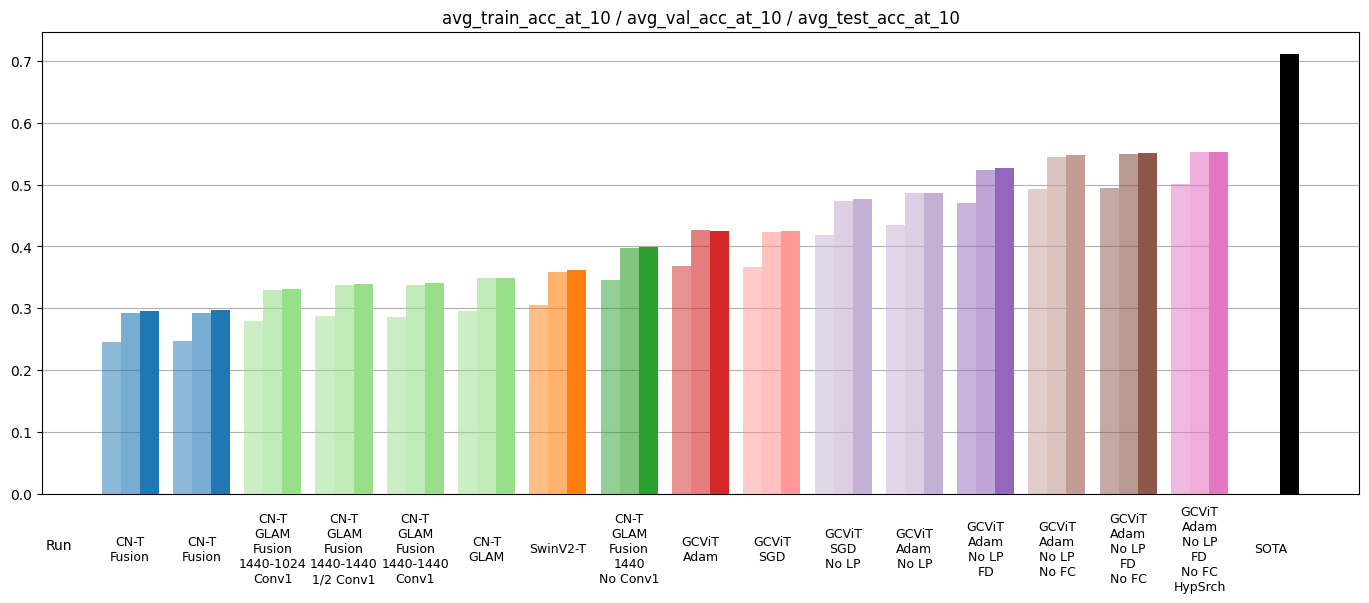

In [132]:
plot_metrics(
    "avg_train_acc_at_10",
    "avg_val_acc_at_10",
    "avg_test_acc_at_10",
)

17
17


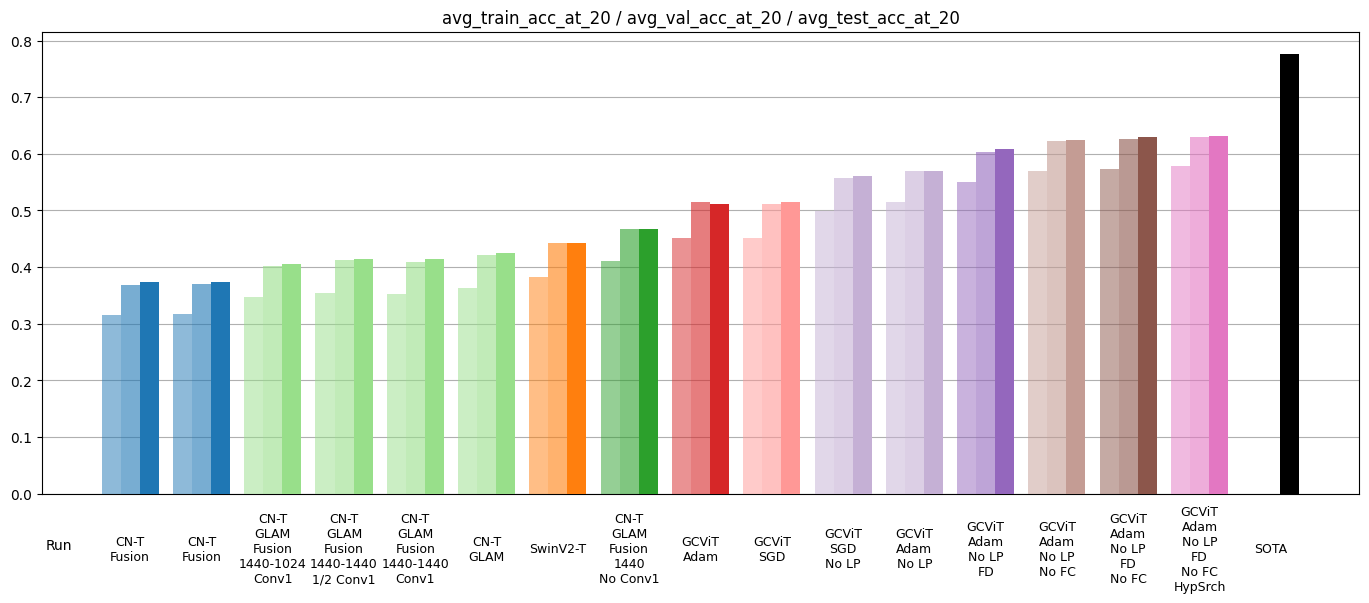

In [133]:
plot_metrics(
    "avg_train_acc_at_20",
    "avg_val_acc_at_20",
    "avg_test_acc_at_20",
)

17
17


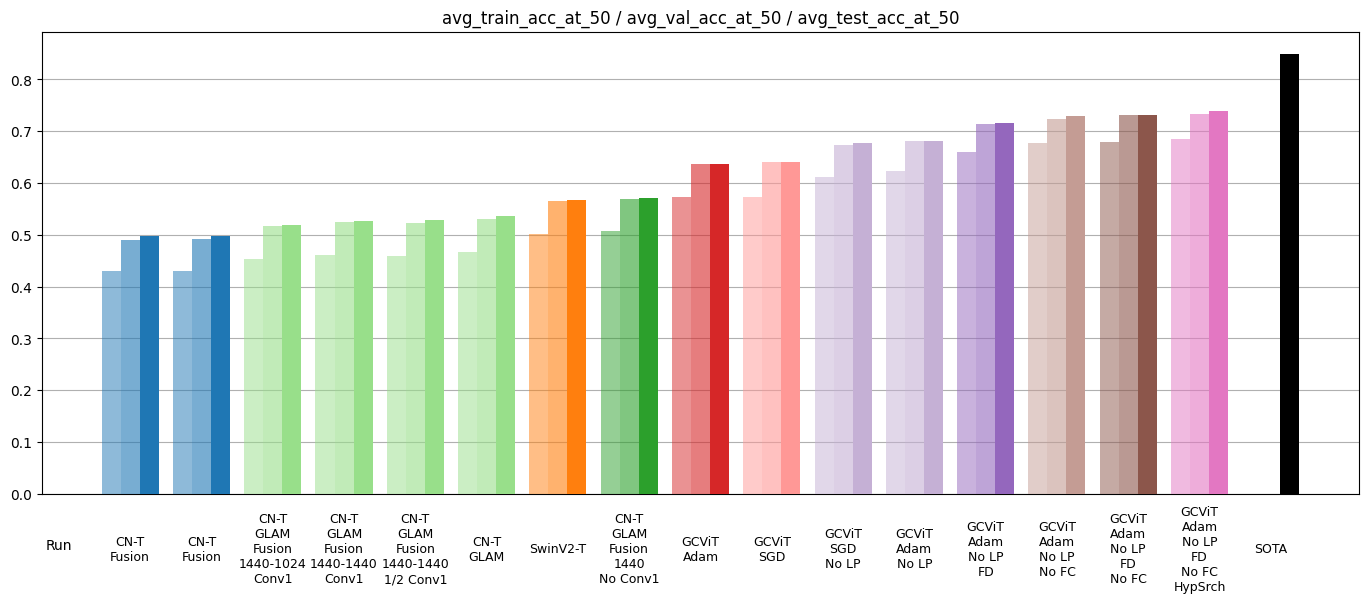

In [134]:
plot_metrics(
    "avg_train_acc_at_50",
    "avg_val_acc_at_50",
    "avg_test_acc_at_50",
)

17
17


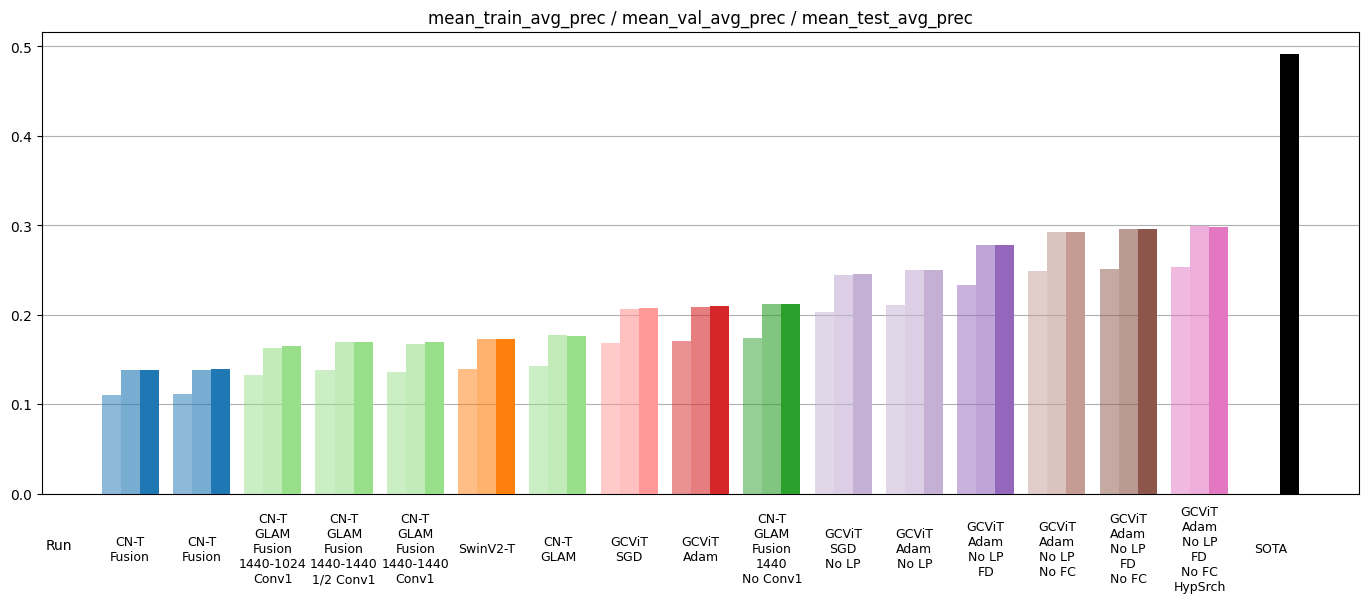

In [135]:
plot_metrics(
    "mean_train_avg_prec",
    "mean_val_avg_prec",
    "mean_test_avg_prec",
)